# (Analyzing Police Activity)
## by (Mazen Sayed)

## Preliminary Wrangling

> The data is collected to analyize traffic stops and what affects a police officers to take an action
> Source : http://openpolicing.stanford.edu/ 
#### The data consists of 2 csv file and a merged dataset from the 2 datasets:
- police.csv : contains the date for each stop,driver gender,driver race,violation,arrested or not and other many
- weather_subset : contains date and temparture at this date
- police_weather : merged dataset from the previous two ,in order to analyze police activity with weather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [20]:
police = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')
weather = weather.loc[:,['DATE','TMIN','TMAX']]

In [21]:
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [22]:
police.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB


In [23]:
# Drop county_name, search_type due to null values
police.drop(['county_name','search_type'],axis = 1,inplace = True)

In [24]:
# Drop rows with null values
police.dropna(inplace = True)

police.isna().sum()

state                 0
stop_date             0
stop_time             0
driver_gender         0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
district              0
dtype: int64

In [27]:
police.shape

(86536, 13)

In [25]:
weather.head()

,DATE,TMIN,TMAX
0,2005-01-01,35,53
1,2005-01-02,28,44
2,2005-01-03,44,53
3,2005-01-04,39,45
4,2005-01-05,28,43


In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 3 columns):
DATE    4017 non-null object
TMIN    4017 non-null int64
TMAX    4017 non-null int64
dtypes: int64(2), object(1)
memory usage: 94.2+ KB


In [29]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
police['stop_date'] = pd.to_datetime(police['stop_date'])

In [31]:
# merging the 2 datasets on the date column
police_weather = pd.merge(left=police, right=weather, left_on='stop_date', right_on='DATE', how='left')

police_weather.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,DATE,TMIN,TMAX
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4,2005-01-04,39,45
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3,2005-01-23,5,28
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4,2005-02-17,29,39
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20,18,34
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3,2005-02-24,18,29


In [32]:
police_weather.shape

(86536, 16)

### What is the structure of your dataset?
- police_weather : (86536, 16) -> the dataset of interest 
- police : (86536, 13)
- weather : (4017, 3)

### What is/are the main feature(s) of interest in your dataset?

- driver gender
- driver race
- stop_outcome
- temperature

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- violation
- stop_outcome
- is_arrested

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## First let's take a look on the difference in gender of the drivers

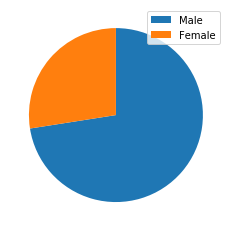

In [49]:
sorted_counts = police_weather['driver_gender'].value_counts()
plt.pie(sorted_counts, startangle = 90,
        counterclock = False);
plt.legend(['Male','Female']);

> It seems that males have stewardship over females in rhode island :)

## Check percentage of arrested drivers on the stoppings

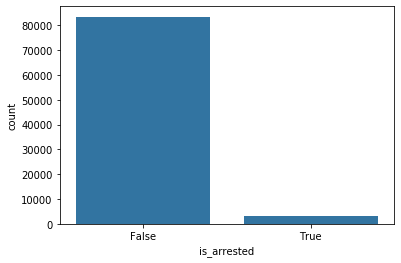

In [50]:
base_color = sb.color_palette()[0]
sb.countplot(data = police_weather, x = 'is_arrested', color = base_color)

> It seems that very low percentage of the people get arrested in a stopping

### Check which violation is more common

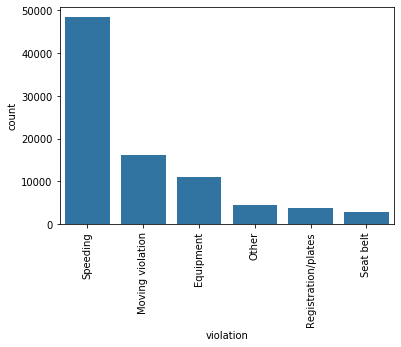

In [58]:
order = police_weather.violation.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = police_weather, x = 'violation', color = base_color,order = order);
plt.xticks(rotation = 90);

> The speeding is the most common violation !

### Check most common stop duration 

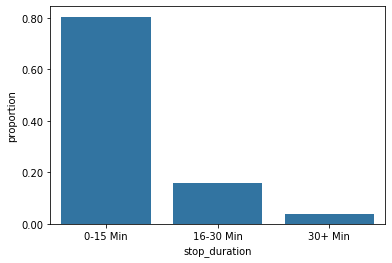

In [63]:
base_color = sb.color_palette()[0]
max_count = police_weather['stop_duration'].value_counts().max()
max_prop = max_count / len(police_weather)

tick_props = np.arange(0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = police_weather, x = 'stop_duration', color = base_color);
plt.yticks(tick_props * len(police_weather), tick_names)
plt.ylabel('proportion');

> An intuative result that the most common stop_duration is 0-15 mins only ! 

### What is the common race in the dataset ?

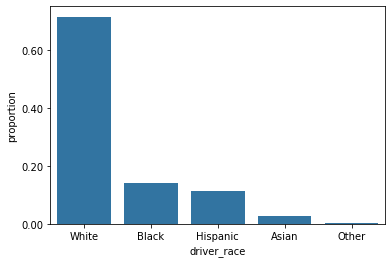

In [139]:
max_count = police_weather['driver_race'].value_counts().max()
max_prop = max_count / len(police_weather)

tick_props = np.arange(0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = police_weather, x = 'driver_race', color = base_color,order = police_weather.driver_race.value_counts().index)

plt.yticks(tick_props * len(police_weather), tick_names)
plt.ylabel('proportion');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I think the distributions is always skewed towards one of the categorical values but no transformations needed 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i cleaned the data from the null values and dropped 2 columns that were full of null values in order to perform clean analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### See if there is any relationship between the gender and violation made

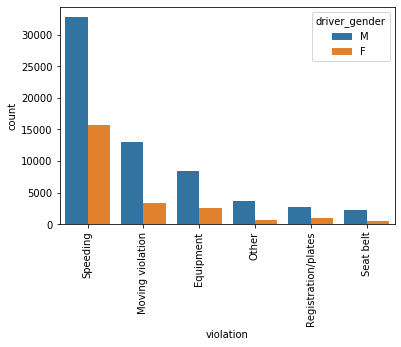

In [67]:
sb.countplot(data = police_weather, x = 'violation', hue = 'driver_gender',order = order) # order is defined in a previous cell
plt.xticks(rotation = 90);

### So i want to explore that males made more violations thane females or this is just because of the imbalance in the data set so let's normalize!

In [119]:
males_violations = police_weather[police_weather['driver_gender'] == 'M'].violation
females_violations = police_weather[police_weather['driver_gender'] == 'F'].violation

In [129]:
males_proportion = males_violations.value_counts() / len(males_violations)
females_proportion = females_violations.value_counts() / len(females_violations)
mixed = pd.DataFrame([males_proportion,females_proportion]).T
mixed.columns = ['Males','Females']
mixed

,Males,Females
Speeding,0.522243,0.658114
Moving violation,0.206144,0.138218
Equipment,0.134158,0.105199
Other,0.058985,0.029738
Registration/plates,0.042175,0.044418
Seat belt,0.036296,0.024312


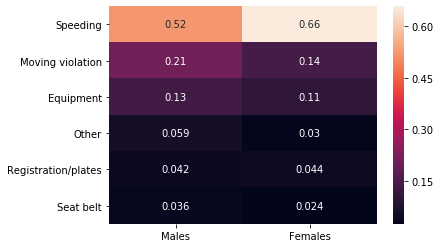

In [135]:
sb.heatmap(mixed,annot = True)

### Surprisingly !! the bar chart in the beginning with so misleading , larger percentage of females are stopped because of speeding more than men!

## Let's see if the police in rhods is racist!

In [159]:
ct_counts = police_weather.groupby(['is_arrested', 'driver_race']).size()
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.pivot(index = 'driver_race', columns = 'is_arrested')
ct_counts.columns = ['not_arrested','arrested']
ct_counts['arrested_percentage'] = ct_counts.arrested / ct_counts.sum(axis=1)
ct_counts.head()

,not_arrested,arrested,arrested_percentage
driver_race,,,
Asian,2343,46,0.019255
Black,11516,769,0.062597
Hispanic,9122,605,0.062198
Other,263,2,0.007547
White,60214,1656,0.026766


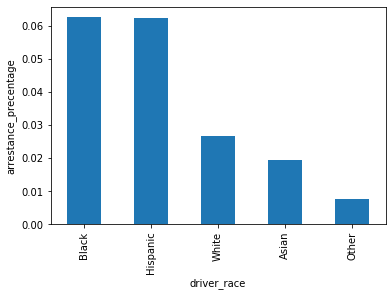

In [234]:
order = ct_counts.arrested_percentage.value_counts().index
ct_counts = ct_counts.sort_values('arrested_percentage')[::-1]
ct_counts['arrested_percentage'].plot(kind='bar');
plt.ylabel('arrestance_precentage');

### Maybe they are racist ! or just Black and Hispanic race makes more violations there

## Does weather affects arresting rate ?

In [209]:
# Feature engineer the temperature from TMAX,TMIN -> TAVG
police_weather['TAVG'] = (police_weather['TMAX'] + police_weather['TMIN']) / 2

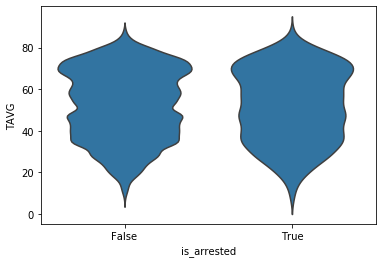

In [211]:
base_color = sb.color_palette()[0]
sb.violinplot(data = police_weather, y = 'TAVG', x = 'is_arrested', color = base_color,
              inner = None)

### Not too much information in this bivarite plot, maybe multivaraite plot gives us more info

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Maybe gender affects violation in someway 
- till now temparture has no effect

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Maybe race affects arrestance in someway

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Let's make use of Multivariate plots to follow the last question:
### Does temprature affects arrestance ?

In [217]:
# Make temperature categorical
police_weather['temp_cat'] = pd.cut(police_weather.TAVG,np.array([7,39,53,67,88]),labels = ['Low','Mid','High','Very High'])

temp_arrestance = police_weather[['temp_cat','is_arrested','violation']].groupby(['violation','temp_cat']).count()
temp_arrestance = temp_arrestance.reset_index()

temp_arrestance.head()

,violation,temp_cat,is_arrested
0,Equipment,Low,2819
1,Equipment,Mid,2709
2,Equipment,High,2586
3,Equipment,Very High,2800
4,Moving violation,Low,3928


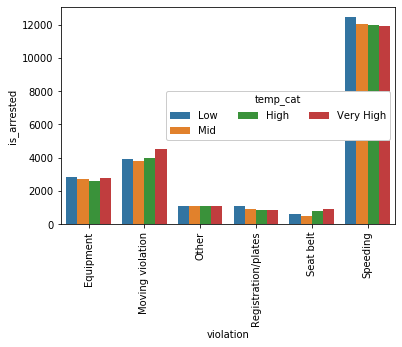

In [231]:
ax = sb.barplot(data = temp_arrestance, x = 'violation', y = 'is_arrested', hue = 'temp_cat')
ax.legend(loc = 5, ncol = 3, framealpha = 1, title = 'temp_cat')
plt.xticks(rotation=90);

### It seems that in some violations the temprature affect the arresting_rate like seat belt , maybe when temp. increase the driver doesn't wear the seatbelt !

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In some violations, as the weather gets worse the arrestance rate increases!

### Were there any interesting or surprising interactions between features?

> That the arrestance rate because of seat belt increases with temprature!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!